In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import date2num
import datetime
import math
%matplotlib inline

1.       What months are most active for property sales? Does this vary by Borough or by Building-Class?
2.       What are 2014’s hottest residential neighborhoods, as measured by year-over-year growth in total sale-value and total sale-count?
3.       Does the residential market prefer new-construction (buildings built within 2years of the sale date)? How does 2014 compare with previous years in this regard?
4.       Please produce a timeseries plot showing monthly YoY sales-growth at various price tiers.
    a. what has the trend been like for sales of properties priced $3M?
    b. modify this to show stats by neighborhood & price-tier; how do sales $3M compare for Brooklyn Heights vs. Bedford-Stuyvesant?  
5.       What neighborhoods have seen the highest turnover in 2014 (as measured by time-between sales of the same property)
6.       Can you visualize YoY sales-growth by neighborhood (or ZIP code) on a map? How would you add the element of time to this map? (use different color) 

### Step1. Knowing the data 

In [2]:
# write a function that concat files from one folder
def combinefiles(foldername):
    from os import listdir
    df = pd.DataFrame()
    onlyfiles = [f for f in listdir(foldername)]
    for ff in onlyfiles:
        if (ff != ".DS_Store"):
            adf= pd.read_excel(foldername+'/'+ff,skiprows=4)
            df = pd.concat([df,adf])
    return df

In [3]:
detail2015 = combinefiles('2015Detail')

In [4]:
detail2014 = combinefiles('2014Detail')

In [5]:
detail2013 = combinefiles('2013Detail')

In [6]:
detail2012 = combinefiles('2012Detail')

In [7]:
#clean data since the key for the 2014 and 2015 dataframe is different,
#change the columne name all to the same to help futher calculation
detail2014.columns = list(detail2015.columns.values)
detail2013.columns = list(detail2015.columns.values)
detail2012.columns = list(detail2015.columns.values)

In [8]:
detail2015.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905,28,,A9,1665 WASHINGTON AVENUE,,...,1,0,1,4750,2619,1899,1,A9,0,2015-08-07
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905,28,,A9,1665 WASHINGTON AVENUE,,...,1,0,1,4750,2619,1899,1,A9,0,2015-08-07
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,28,,A1,2329 WASHINGTON AVE,,...,1,0,1,1103,1290,1910,1,A1,300000,2015-02-20
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,36,,S1,455 EAST 184 STREET,,...,1,1,2,2500,2452,1910,1,S1,0,2015-08-18
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,36,,S1,455 EAST 184 STREET,,...,1,1,2,2500,2452,1910,1,S1,400000,2015-07-01


In [9]:
detail2013.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE           

### Step 2. define helper function for future question

In [10]:
# present as the time serier data for each area, define
def monthlySale(data):
    df = pd.DataFrame(data)
    countdata = data.groupby(['SALE DATE']).size()
    cSale = pd.DataFrame(countdata).reset_index()
    cSale.columns = ['SALE DATE','sales count']
    purchase_patterns = cSale.set_index('SALE DATE')
    output = purchase_patterns.resample('M',how=sum)
    return output
    #purchase_plot = output.plot(title="Total Number of Sales by Month for "+districtName \ ,legend=None, figsize=(6,3))

In [11]:
def makeMonth(year):
    months =[] 
    for i in range(12):
        month = datetime.datetime(2015, i+1, 1, 0, 0)
        months.append(month)
    x = date2num(months)
    return x

In [12]:
def saleRes(dframe):
    output = dframe.loc[dframe['TAX CLASS AT PRESENT'].isin([1,2,'1A','1B','2A','2B','2C'])]
    return output

### Step 3. list of assmuption and concern

### Step 4. Answering the given question

### Q1: What months are most active for property sales? Does this vary by Borough or by Building-Class?
       

In [13]:
# calculate the standard deviation
def salebyBorough(year,df):
    x = makeMonth(year)
    Borough = ['bronx', 'brooklyn' ,'manhattan', 'queens' ,'staten island']
    ax = plt.subplot(111)
    i = 0

    for key,grp in df.groupby(['BOROUGH']):
        ax.plot(x,monthlySale(grp),label = Borough[i])
        i = i+1
    ax.xaxis_date()
    ax.set_ylabel('num of sales') 
    ax.set_title("Total Number of Sales by Month by borough for"+ str(year))
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [14]:
def salebyBuildClass(year,df):
    x = makeMonth(year)    
    ax = plt.subplot(111)
    for key,grp in detail2015.groupby(['BUILDING CLASS CATEGORY']):
        plt.plot(monthlySale(grp),label = key)
    plt.title("Total Number of Sales by Month by building class for 2015")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

### Group by Borough plots for each year

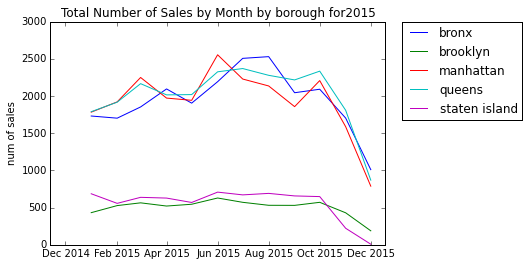

In [15]:
salebyBorough(2015,detail2015)

### A1. 
General speaking, The most activity months for Manhattan is in June, for Bronx is July and Auguest.There is no significant active month for other area. The lest active month for all borough is December. From the figuer below, we could see the variation among building classes. The general trend for class 01, 02, 03, and 07 is same with the most activy months in the thrid quarter. Also, the variation amonge different building class is large than the variation among different borough.    

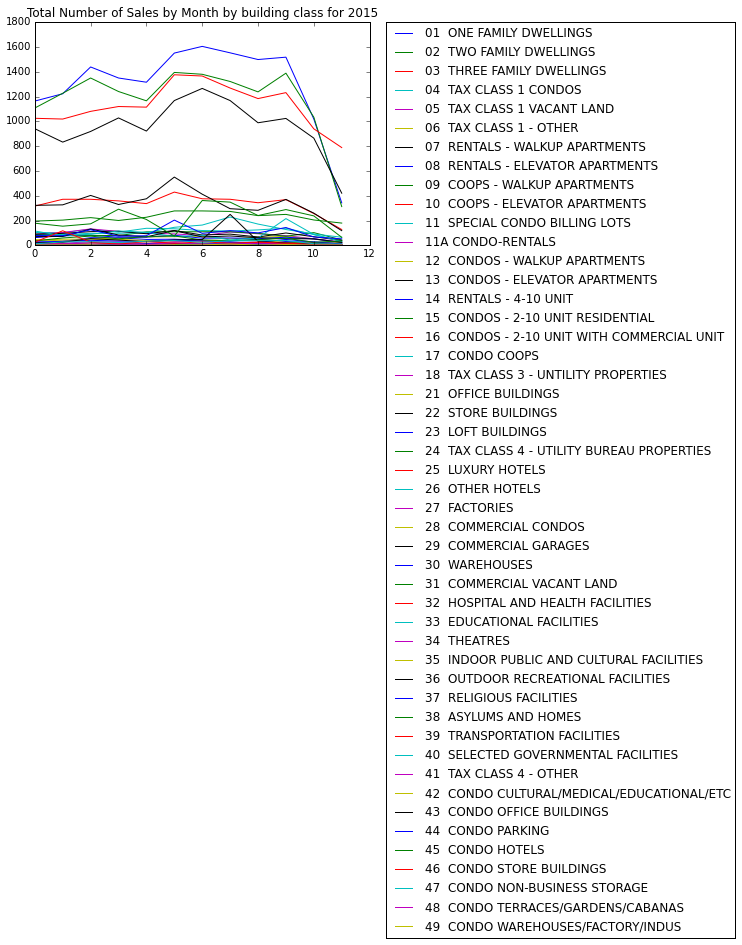

In [16]:
salebyBuildClass(2015,detail2015)

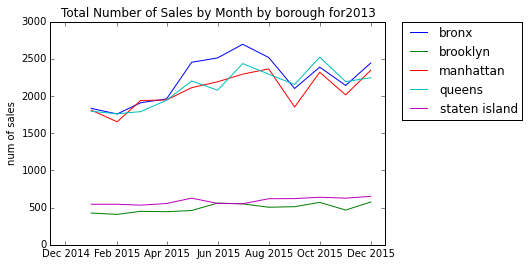

In [17]:
salebyBorough(2013,detail2013)

We can see the property sale market become more and more activity through the year for bronx, brookly, and manhattan borough

### Q2. What are 2014’s hottest residential neighborhoods, as measured by year-over-year growth in total sale-value and total sale-count?

In [18]:
# step 1. select the residential neighborhoods
res2015 = saleRes(detail2015)
res2014 = saleRes(detail2014)
res2013 = saleRes(detail2013)
res2012 = saleRes(detail2012)

In [19]:
# calculate the sale-value, and sale-count for each month, given the yearly detailed sale record. 
def AnnalSale(AnnalDf,year):
    totalSaleCounts = []
    totalSaleValues = []
    names=[]
    for key,grp in AnnalDf.groupby(['NEIGHBORHOOD']):
        totalSaleCount = grp['SALE PRICE'].count()
        totalSaleValue = grp['SALE PRICE'].sum()
        totalSaleValues.append(totalSaleValue)
        totalSaleCounts.append(totalSaleCount)
        names.append(key)
    counts = pd.Series(totalSaleCounts, index=names)
    sales = pd.Series(totalSaleValues, index=names)
    df = pd.DataFrame(counts, columns=['COUNTS'+year])
    df['SALES'+year] = sales
    df =df.reset_index()
    df=df.rename(columns = {'index':'NEIGHBORHOOD'})
    return df

In [20]:
resNei2013 = AnnalSale(res2014,'2013')
resNei2014 = AnnalSale(res2013,'2014')
#resNei2015 = AnnalSale(res2015,'2015')

In [21]:
resNei201314 = pd.merge(resNei2013, resNei2014,how = 'outer',on='NEIGHBORHOOD')

In [22]:
resNei201314.head()

,NEIGHBORHOOD,COUNTS2013,SALES2013,COUNTS2014,SALES2014
0,AIRPORT LA GUARDIA,3,961000,11,2820000
1,ALPHABET CITY,153,310572812,160,281378207
2,ANNADALE,181,73368358,182,60502955
3,ARDEN HEIGHTS,241,57985014,251,65661353
4,ARROCHAR,26,8728587,26,6436425


In [23]:
resNei201314['COUNTSDIFF'] = resNei201314['COUNTS2014']- resNei201314['COUNTS2013']
resNei201314['SALESDIFF'] = resNei201314['SALES2014']- resNei201314['SALES2013']

### A2: 
The hottest residential neighborhoods is LONG ISLAND CITY measured by year-over-year total sale-count, and it is GRAMERCY measured by year over year total sale value. 

In [24]:
saleCountsGrowthMax = resNei201314['COUNTSDIFF'].max()
print saleCountsGrowthMax
idx1 =resNei201314['COUNTSDIFF'].idxmax() 
neighCountsGMax = resNei201314['NEIGHBORHOOD'][idx1]
print 'The hottest residential neighborhoods is '+ neighCountsGMax +'measured by year-over-year total sale-count'

203.0
The hottest residential neighborhoods is LONG ISLAND CITY         measured by year-over-year total sale-count


In [25]:
saleValueGrowthMax = resNei201314['SALESDIFF'].max()
print saleValueGrowthMax
idx2 =resNei201314['SALESDIFF'].idxmax() 
neighSaleGMax = resNei201314['NEIGHBORHOOD'][idx2]
print 'the hottest residential neighborhoods is '+ neighSaleGMax +'measured by year-over-year total sale-value'

483192049.0
the hottest residential neighborhoods is GRAMERCY                 measured by year-over-year total sale-value


### Q3.  Does the residential market prefer new-construction (buildings built within 2years of the sale date)? How does 2014 compare with previous years in this regard?

In [26]:
def quest3(resDf,year):
    resC = resDf.iloc[:,1].count()
    #print resC
    # select the new construction build (>0 and <=2) and counts the number of this type of property sale
    resnewBuild = resDf.loc[resDf['YEAR BUILT'].isin([year,year-1,year-2])]
    resnewBuildC = resnewBuild.iloc[:,1].count()
    #print resnewBuildC
    pctNew = format(float(resnewBuildC)/float(resC)*100,'.3f')
    print 'In '+str(year)+' residential market '+str(pctNew)+'% prefer new-construction (buildings built within 2 years of the sale date)'
    resnew0 = resDf.loc[resDf['YEAR BUILT']==0]
    resnew0C = resnew0.iloc[:,1].count()
    #print resnew0C
    pctUNBuild=format(float(resnew0C)/float(resC)*100,'.3f')
    print 'about '+str(pctUNBuild)+'% of the construction have not been finished'

In [27]:
newConsper2015 = quest3(res2015,2015)
newConsper2014 = quest3(res2014,2014)
newConsper2013 = quest3(res2013,2013)
newConsper2012 = quest3(res2012,2012)

In 2015 residential market 2.965% prefer new-construction (buildings built within 2 years of the sale date)
about 6.071% of the construction have not been finished
In 2014 residential market 2.824% prefer new-construction (buildings built within 2 years of the sale date)
about 7.196% of the construction have not been finished
In 2013 residential market 1.883% prefer new-construction (buildings built within 2 years of the sale date)
about 7.576% of the construction have not been finished
In 2012 residential market 2.314% prefer new-construction (buildings built within 2 years of the sale date)
about 9.082% of the construction have not been finished


### 4.Please produce  timeseries plot showing monthly YoY sales-growth at various price tiers.
a. what has the trend been like for sales of properties priced \$3M?
b. modify this to show stats by neighborhood & price-tier; how do sales \$3M compare for Brooklyn Heights vs. Bedford-Stuyvesant?

### Assumption: 
The price tier is classified in the following way: the sales which up to 1/3 of the total sales record in that year is the low price tier, the one which range from 1/3 to 2/3 of the total sales record in that year is the middle tier, the rest is the high tier. In addition, we exclude \$0 Sales Price property transfer. (see the make price tier function).

Two method is used to address the property sale priced \$3M: 

The first method is to just calculate the number of sale change for the properties priced \$3M $\pm$ 0.15M. (see YoY3MNum)  The second method is to solve the equvilent property for \$3M in the last year. The equilency is determined by the position of this sale in the high teir sales. Then calculate the growth rate for the price with the \$3M. (see YoY3MGrowth)

In [28]:
def makePricetier(detail):
    # set the SALE PRICE == 0 as the outlier
    nonZeroResult = detail.loc[detail['SALE PRICE']!=0]
    sales = nonZeroResult['SALE PRICE']
    breakPrice1 = sales.quantile([0.333]).values[0]
    breakPrice2 = sales.quantile([0.667]).values[0]
    lowTier= detail.loc[(detail['SALE PRICE']>0) & (detail['SALE PRICE']<=breakPrice1)]
    midTier =detail.loc[(detail['SALE PRICE']> breakPrice1) & (detail['SALE PRICE']<=breakPrice2)]
    highTier =detail.loc[(detail['SALE PRICE']>breakPrice2)]
    out = [lowTier,midTier,highTier]
    return out

In [29]:
# this will cause a bug when the some month have zero sales record. 
def YoYSaleGrowth(thisyear,lastyear):
    purchase_patterns1 = thisyear[['SALE PRICE','SALE DATE']]
    purchase_patterns1 = purchase_patterns1.set_index('SALE DATE')
    a= purchase_patterns1.resample('M',how=sum)
    purchase_patterns2 = lastyear[['SALE PRICE','SALE DATE']]
    purchase_patterns2 = purchase_patterns2.set_index('SALE DATE')
    b = purchase_patterns2.resample('M',how=sum)
    a['SALE PRICE'] = a['SALE PRICE'].astype(float)
    dif = pd.DataFrame((a.values-b.values)/(b.values)*100, columns=a.columns)
    x = np.arange(1,13,1)
    y = np.round(dif.values,2)
    return [x,y]

In [30]:
def YoYSaleGrowth2(thisyear, lastyear):
    pdf1 = thisyear[['SALE PRICE','SALE DATE']]
    pdf1.index=pdf1['SALE DATE']
    pdf2 = lastyear[['SALE PRICE','SALE DATE']]
    pdf2.index=pdf2['SALE DATE']
    ptotal1 = np.zeros((12,1))
    ptotal2 = np.zeros((12,1))
    dif = np.zeros((12,1))
    for month1,grp1 in pdf1.groupby(pdf1.index.month):
        tp1 = grp1['SALE PRICE'].sum()
        ptotal1[month1-1] = tp1
    for month2,grp2 in pdf2.groupby(pdf2.index.month):
        tp2 = grp2['SALE PRICE'].sum()
        ptotal2[month2-1] = tp2
    for i in range(12):
        if (ptotal1[i] != 0) and (ptotal2[i] !=0):
            dif[i] = (ptotal1[i]-ptotal2[i])/ptotal2[i]*100
        dif = np.round(dif,2)
    x = np.arange(1,13,1)
    return [x,dif]        

In [31]:
def YoYsalePlt(dfthisyear,dflastyear,year):
    [low2015, mid2015,hig2015] = makePricetier(dfthisyear)
    [low2014, mid2014,hig2014] = makePricetier(dflastyear)
    
    YoYlow = YoYSaleGrowth(low2015,low2014)
    YoYmid = YoYSaleGrowth(mid2015,mid2014)
    YoYhig = YoYSaleGrowth(hig2015,hig2014)

    x = makeMonth(year)

    ax = plt.subplot(111)
    ax.plot(x,YoYlow[1],label = 'low')
    ax.plot(x,YoYmid[1],label = 'mid')
    ax.plot(x,YoYhig[1],label = 'high')

    ax.xaxis_date()
    ax.set_ylabel('YoY sale growth') 
    ax.set_title('YoY sales-growth at various price tiers '+ str(year))
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    return [YoYlow[1], YoYmid[1],YoYhig[1]]

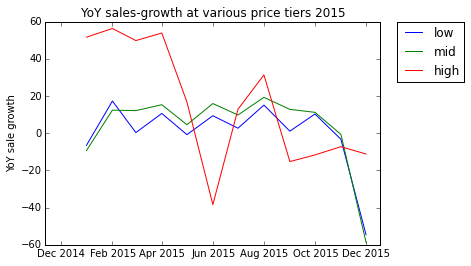

In [32]:
YoY2015 = YoYsalePlt(detail2015,detail2014, 2015)

In [33]:
def YoY3MNum(thisyear,lastyear):    
    pdf1 = thisyear[['SALE PRICE','SALE DATE']]
    pdf1.index=pdf1['SALE DATE']
    pdf2 = lastyear[['SALE PRICE','SALE DATE']]
    pdf2.index=pdf2['SALE DATE']
    numSaleCountGrowth =[]
    keys = []
    
    for A,B in zip(pdf1.groupby(pdf1.index.month), pdf2.groupby(pdf2.index.month)):
        key = A[0]
        pSer1 = A[1]['SALE PRICE']
        pSer2 = B[1]['SALE PRICE']
        numSale1 = pSer1[(pSer1<=3150000) & (pSer1>2850000)].count()
        numSale2 = pSer2[(pSer2<=3150000) & (pSer2>2850000)].count()
        if numSale1 <1:
            print 'There is no property priced at $3M for '+str(key)
        else:
            saleG = float(numSale1-numSale2)/numSale1
            saleGrowth = round(saleG*100,2)
            keys.append(key)
            numSaleCountGrowth.append(saleGrowth)
    return [keys,numSaleCountGrowth]

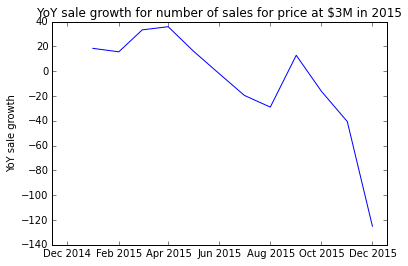

In [34]:
out2 = YoY3MNum(detail2015,detail2014)
x = makeMonth(2015)
ax = plt.subplot(111)
ax.plot(x,out2[1])
ax.xaxis_date()
ax.set_ylabel('YoY sale growth') 
ax.set_title('YoY sale growth for number of sales for price at $3M in '+ str(2015))
plt.show()

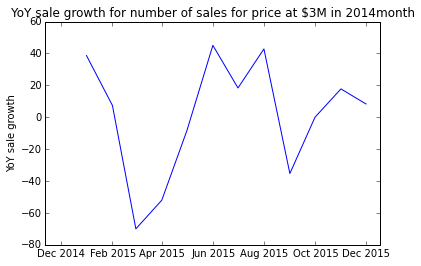

In [35]:
out2 = YoY3MNum(detail2014,detail2013)
x = makeMonth(2015)
ax = plt.subplot(111)
ax.plot(x,out2[1])
ax.xaxis_date()
ax.set_ylabel('YoY sale growth') 
ax.set_title('YoY sale growth for number of sales for price at $3M in '+ str(2014)+'month')
plt.show()

In [36]:
# use the price for 3M in 2015 as the base price, and find the price for 2014, which it has the excle
def YoY3MGrowth(thisyear,lastyear):
    pdf1 = thisyear[['SALE PRICE','SALE DATE']]
    pdf1.index=pdf1['SALE DATE']
    pdf2 = lastyear[['SALE PRICE','SALE DATE']]
    pdf2.index=pdf2['SALE DATE']
    eq3mRates =[]
    keys = []
    for A,B in zip(pdf1.groupby(pdf1.index.month), pdf2.groupby(pdf2.index.month)):
        key = A[0]
        pSer1 = A[1]['SALE PRICE']
        pSer2 = B[1]['SALE PRICE']
        numSale1 = pSer1.count()
        low3m = pSer1.loc[pSer1>=300000]
        post3m = float(low3m.count())/numSale1
        eq3m = pSer2.quantile([post3m])
        eq3mRate = eq3m.iloc[0]/3000000*100
        eq3mRates.append(eq3mRate)
        keys.append(key)
    return [keys,eq3mRates]

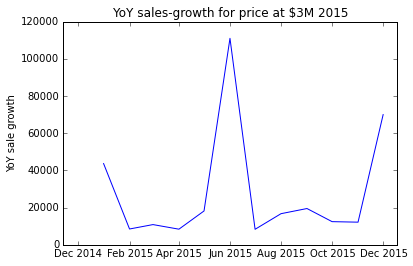

In [38]:
[low2015,mid2015,hig2015]=makePricetier(detail2015)
[low2014,mid2014,hig2014]=makePricetier(detail2014)
[low2013,mid2013,hig2013]=makePricetier(detail2013)
out = YoY3MGrowth(hig2015,hig2014)
x = makeMonth(2015)
ax = plt.subplot(111)
ax.plot(x,out[1])
ax.xaxis_date()
ax.set_ylabel('YoY sale growth') 
ax.set_title('YoY sales-growth for price at \$3M '+ str(2015))
plt.show()

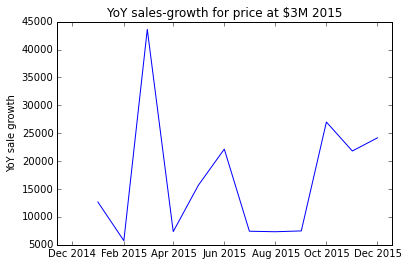

In [39]:
out = YoY3MGrowth(hig2014,hig2013)
x = makeMonth(2015)
ax = plt.subplot(111)
ax.plot(x,out[1])
ax.xaxis_date()
ax.set_ylabel('YoY sale growth') 
ax.set_title('YoY sales-growth for price at \$3M '+ str(2015))
plt.show()

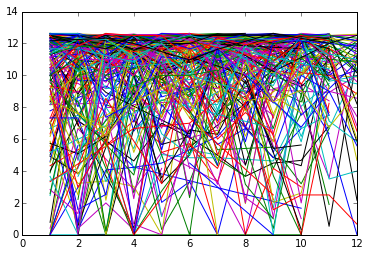

In [40]:
 #calcuate by neighboohoods,which will be 
for A, B in zip(hig2015.groupby(['NEIGHBORHOOD']), low2015.groupby(['NEIGHBORHOOD'])):
    key = A[0]
    grp1 = A[1]
    grp2 = B[1]
    result = YoY3MGrowth(grp1,grp2)
    plt.plot(result[0],result[1],label = 'hig')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
# the result is very messy 

####  select two neighborhood Brooklyn Heights vs. Bedford-Stuyvesant?  

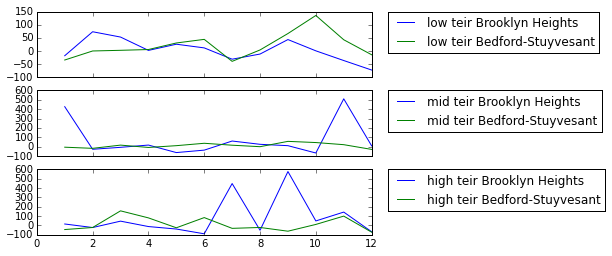

In [41]:
BH2015 = detail2015[detail2015['NEIGHBORHOOD'].str.contains('BROOKLYN HEIGHTS')]
BS2015 = detail2015[detail2015['NEIGHBORHOOD'].str.contains('BEDFORD STUYVESANT')]
BH2014 = detail2014[detail2014['NEIGHBORHOOD'].str.contains('BROOKLYN HEIGHTS')]
BS2014 = detail2014[detail2014['NEIGHBORHOOD'].str.contains('BEDFORD STUYVESANT')]

[BHlow2015, BHmid2015,BHhig2015] = makePricetier(BH2015)
[BHlow2014, BHmid2014,BHhig2014] = makePricetier(BH2014)
[BSlow2015, BSmid2015,BShig2015] = makePricetier(BS2015)
[BSlow2014, BSmid2014,BShig2014] = makePricetier(BS2014)


BHYoYlow = YoYSaleGrowth(BHlow2015,BHlow2014)
BHYoYmid = YoYSaleGrowth(BHmid2015,BHmid2014)
BHYoYhig = YoYSaleGrowth(BHhig2015,BHhig2014)

BSYoYlow = YoYSaleGrowth(BSlow2015,BSlow2014)
BSYoYmid = YoYSaleGrowth(BSmid2015,BSmid2014)
BSYoYhig = YoYSaleGrowth(BShig2015,BShig2014)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax1.plot(BHYoYlow[0],BHYoYlow[1], label = 'low teir Brooklyn Heights')
ax1.plot(BSYoYlow[0],BSYoYlow[1], label = 'low teir Bedford-Stuyvesant')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax2.plot(BHYoYmid[0],BHYoYmid[1], label = 'mid teir Brooklyn Heights')
ax2.plot(BSYoYmid[0],BSYoYmid[1], label = 'mid teir Bedford-Stuyvesant')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax3.plot(BHYoYhig[0],BHYoYhig[1], label = 'high teir Brooklyn Heights')
ax3.plot(BSYoYhig[0],BSYoYhig[1], label = 'high teir Bedford-Stuyvesant')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

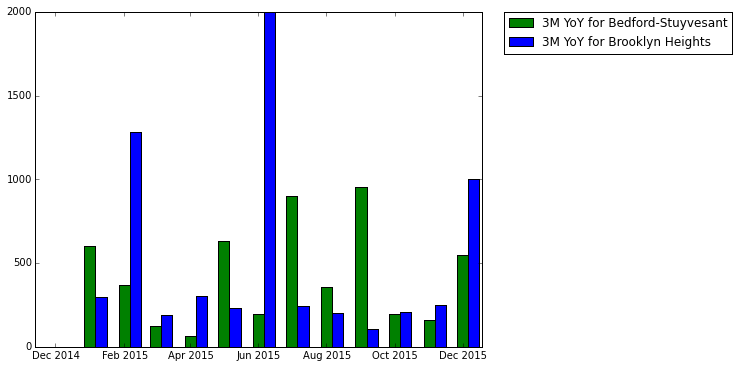

In [42]:
BS3mOut = YoY3MGrowth(BShig2015,BShig2014)
BH3mOut = YoY3MGrowth(BHhig2015,BHhig2014)


months =[] 
for i in range(12):
    month = datetime.datetime(2015, i+1, 1, 0, 0)
    months.append(month)

x = date2num(months)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 6)
ax = plt.subplot(111)
ax.bar(x-5, BS3mOut[1], color='g',width=10, label = '3M YoY for Bedford-Stuyvesant')
ax.bar(x+5, BH3mOut[1], color='b',width=10, label = '3M YoY for Brooklyn Heights')
ax.xaxis_date()

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [43]:
BS3mOut2 = YoY3MNum(BShig2015,BShig2014)
BH3mOut2 = YoY3MNum(BHhig2015,BHhig2014)

There is no property priced at $3M for 1
There is no property priced at $3M for 2
There is no property priced at $3M for 3
There is no property priced at $3M for 4
There is no property priced at $3M for 7
There is no property priced at $3M for 9
There is no property priced at $3M for 11
There is no property priced at $3M for 12
There is no property priced at $3M for 1
There is no property priced at $3M for 2
There is no property priced at $3M for 4
There is no property priced at $3M for 5
There is no property priced at $3M for 6
There is no property priced at $3M for 7
There is no property priced at $3M for 8
There is no property priced at $3M for 10
There is no property priced at $3M for 12


###  5. What neighborhoods have seen the highest turnover in 2014 (as measured by time-between sales of the same property)

In [44]:
from datetime import timedelta
def turnoverTime(frame):
    frame=pd.DataFrame(BH2015,columns=['ADDRESS','APARTMENT NUMBER','SALE PRICE','SALE DATE'])
    frame['UID'] = frame['ADDRESS'].map(str)+frame['APARTMENT NUMBER'].map(str) 
    df = frame[frame.duplicated(['UID'], keep = False)]
# calculate the average turn over time  
    num = 0
    turnTs = []
    totTurnT = 0
    for i in range(0, df.shape[0]-1):
        row1 = df.irow(i)
        row2 = df.irow(i+1)
        if row1['UID'] ==row2['UID']:
            turnT = abs(row2['SALE DATE']-row1['SALE DATE']) / timedelta(days=1)
            totTurnT = totTurnT+turnT
            num = num + 1
            turnTs.append(turnT)
    aveTurnDay = totTurnT/num
    out = [aveTurnDay, num]
    return out

In [45]:
keys = []
turnTs = []
numTs = []
for key,grp in detail2014.groupby(['NEIGHBORHOOD']):
    keys.append(key)
    tN = turnoverTime(grp) 
    turnTs.append(tN[0])
    numTs.append(tN[1])
minTurnT = min(turnTs)
maxNumT = max(numTs)
mostTurn = keys[numTs.index(maxNumT)]
frqTurn = keys[turnTs.index(minTurnT)]

/Users/geographer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
/Users/geographer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: irow(i) is deprecated. Please use .iloc[i]


In [46]:
print mostTurn + 'has the most properties being sold more than twice in 2014 '
print frqTurn + 'has the fast highest turnover, for which the average turn over time for properties sold more than twice is' + str(minTurnT)

AIRPORT LA GUARDIA       has the most properties being sold more than twice in 2014 
AIRPORT LA GUARDIA       has the fast highest turnover, for which the average turn over time for properties sold more than twice is73.9


### 6.Can you visualize YoY sales-growth by neighborhood (or ZIP code) on a map? How would you add the element of time to this map? 

In [47]:
# total have 7 color <-100, >100, 0, -25, -50, -75, 25, 50,75
def mask(numL):
    out = []
    for num in numL:
        if num <= -100:
            a = '<= 100%'
        elif (num <= -75 and num > -100):
            a = '-100% ~ -75%'
        elif (num <= -50 and num > -75 ):
            a = '-75% ~ -50%'
        elif (num <= -25  and num > -50):
            a = '-50% ~ -25%'
        elif (num <= 0  and num > -25):
            a = '-25% ~ 0%'
        elif (num <= 25 and num > 0):
            a = '0% ~ 25%'
        elif (num <= 50 and num > 25):
            a = '25% ~ 50%'
        elif (num <= 75 and num > 50):
            a = '50% ~ 75%'
        elif (num <= 100 and num > 75):
            a = '75% ~ 100%'
        else:
            a = '>100%'
        out.append(a)
    l = np.asarray(out)
    return np.transpose([l]).T

In [48]:
# return a table that has size of total zip code, have total of three rows the first row is the zip code, second row it month,the third row is the sale growth
import csv

zips = []
saleGrowth12m = []
outA = np.chararray([1,4])
outA[0,0] = "ZIPCODE"
outA[0,1] = "MONTH"
outA[0,2] = "YOYSALEGROWTH"
outA[0,3] = "YOYCATEGRA"

for A, B in zip(detail2015.groupby(['ZIP CODE']), detail2014.groupby(['ZIP CODE'])):
    key = A[0]
    grp1 = A[1]
    grp2 = B[1]
    #The reason to change to YoYSaleGrowth2 is because for some places there might does not have sale record for a given month
    out = YoYSaleGrowth2(grp1, grp2) 
    outT = np.zeros((1,12))+out[0]
    outv = out[1]
    outV = (np.array([outv])[0]).T
    outV2 =  mask(outv)
    outZ = np.zeros((1,12))+key
    print outZ.shape
    break
    output = np.vstack((outZ,outT, outV, outV2))
    outa = np.transpose(output)
    outA = np.vstack((outA,outa))

(1, 12)


In [49]:
with open('saleGrowth2015zip.csv', "wb") as f:
    writer = csv.writer(f)
    writer.writerows(outA)

In [50]:
from IPython.display import HTML
HTML('<iframe width="100%" height="520" frameborder="0" src="https://ma333jie.cartodb.com/viz/249ca064-d2cb-11e5-8f28-0e674067d321/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')